In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval

In [2]:
artists = pd.read_csv('dataset/artists.csv')
tracks= pd.read_csv('dataset/tracks.csv')


In [3]:
artists.info

<bound method DataFrame.info of                              id  followers                 genres  \
0        0DheY5irMjBUeLybbCUEZ2        0.0                     []   
1        0DlhY15l3wsrnlfGio2bjU        5.0                     []   
2        0DmRESX2JknGPQyO15yxg7        0.0                     []   
3        0DmhnbHjm1qw6NCYPeZNgJ        0.0                     []   
4        0Dn11fWM7vHQ3rinvWEl4E        2.0                     []   
...                         ...        ...                    ...   
1104344  6rJIG42vcWAf1UBdRFlQxB     3345.0                     []   
1104345  1ljurfXKPlGncNdW3J8zJ8     2123.0  ['deep acoustic pop']   
1104346  2vnT9YhKIvjVo9LnVjWmr2       26.0                     []   
1104347  3ID0E5XCvnJIYZEq043ZoB      406.0                     []   
1104348  5m0Y4WSYyai2BU752lCASy      146.0                     []   

                                                   name  popularity  
0        Armid & Amir Zare Pashai feat. Sara Rouzbehani           0  

In [4]:
artists.head(5)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [5]:
artists = artists.rename(columns={'id': 'id_artists'})

In [6]:
tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


## Features

In [7]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id_artists  1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [8]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

## Data Cleaning

### Artists

In [9]:
len(artists)

1104349

In [10]:
pd.isnull(artists).sum()

id_artists     0
followers     13
genres         0
name           0
popularity     0
dtype: int64

It is seen that there 13 rows that has followers as null. We can either replace these nulls with 0s or the average followers or just take those 13 rows off the dataset as 13 is a negligible number when compared to the artists. We will check out the 13 rows and see if taking away these points will impact the EDA and model building and then see which method has to be followed.

In [11]:
artists[artists['followers'].isna()]

,id_artists,followers,genres,name,popularity
444199,7F71W80jaXFARK7hBjsDI2,NaN,['czech pop'],Marcell,36
444200,3MLHJz04KmEVzCTPclzkEm,NaN,['czech pop'],Niko,21
444797,0cqZsULDZdJTGA4Zqh8Ckv,NaN,[],Savzilla,0
444798,0BuknWzKujyc9HfZ1V50Uk,NaN,[],Duck Doja,0
446635,6ltU5gIDLmWNYaVNHnll5G,NaN,['mexican electronic'],Zofa,0
446636,7C9nWRMbRqpPUuKh2OEw9n,NaN,[],MHV,3
446637,41c30F8zy5UCTSevbn0WfD,NaN,['mexican electronic'],Broadband Star,0
468525,1DK979aOesiZ4Vkus8txqu,NaN,[],AmorArtis Orchestra & Johannes Somary,2
468526,6jkpqSWWsXSuqtsoeAiMDU,NaN,['uk americana'],Police Dog Hogan,14
468527,7aMdHPv79qOuqqBD6TnaCp,NaN,[],"Miles Davis & Charlie ""Bird"" Parker",0


From the above data, it is also seen that the genre list is empty for a lot of artists. This has to be further investigated and see how it will effect the model.

In [12]:
artists.loc[artists['genres']==	"[]"]


,id_artists,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104343,6IllWwuEZXv8D8Z3zq41Uu,5.0,[],Chase Kroesche,0
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


From this we see that there are a lot of artists without genres, so we cannot use genre as one of our features from the artists dataset for our recommendation task. So it is good to just drop this coloumn.

In [13]:
artists=artists.drop("genres",axis=1)

In [14]:
artists.head(5)

,id_artists,followers,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,Ioannis Panoutsopoulos,0


### Tracks

In [15]:
len(tracks)

586672

In [16]:
pd.isnull(tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

It is seen that there 71 rows that has followers as null. We can either replace these nulls with 0s or the average followers or just take those 71 rows off the dataset as 71 is a negligible number when compared to the number of tracks that are present. We will check out the 71 rows and see if taking away these points will impact the EDA and model building and then see which method has to be followed.

In [17]:
name_list=tracks[tracks['name'].isna()]
name_list

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


From the above data, we see that the name of the songs and artists are not present which makes it impossible to fit into the recommender system and adding these data points will only add to error in the modeling of the recommender system. Hence, we feel it is optimal to take these  values off the dataset for better recommender system. From the above data it is also seen that there are few rows with empty artists list. We need to investigate this too.

In [18]:
tracks.tail(20)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586652,1fXmDeiCb3ABt5CzkMxp4u,Lotus Inn,63,195868,0,"[""Why Don't We""]",['2jnIB6XdLvnJUeNTy5A0J2'],2020-12-04,0.578,0.7400,2,-5.080,1,0.0721,0.0119,0.000000,0.1800,0.4950,155.984,4
586653,6jMIzxLw7QDtvfo9XYFjKy,最嚮往的地方,48,232784,0,['JJ Lin'],['7Dx7RhX0mFuXhCOUgB01uM'],2020-10-20,0.457,0.6790,2,-5.352,1,0.0502,0.2790,0.000000,0.1280,0.3010,179.813,3
586654,6sHxpnCerm9M6A5zaFFNfs,Gone,66,205462,0,['Blake Rose'],['7wLyGTO9vUS7ndlq4BvBGe'],2020-02-07,0.317,0.5450,11,-6.439,0,0.0469,0.0390,0.000000,0.1160,0.1400,139.014,5
586655,2nt8dbNspSCB9p7YgLIblV,执迷不悟 - DJ版,50,245625,0,['小乐哥'],['7LadOFiUVrFL5Ancq9RLtP'],2020-09-22,0.792,0.8030,0,-5.044,1,0.0443,0.3330,0.000121,0.2140,0.9310,128.003,4
586656,65hdygJXXOBGKS76EKvxth,醒不来的梦,50,232297,0,['回小仙'],['27kWsk6mk6DeqQhdOHsyej'],2020-09-29,0.744,0.6050,5,-5.830,0,0.0318,0.4970,0.000000,0.3940,0.4710,108.012,4
586657,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,['Laureen Conrad'],['7vgGpuiXdNlCmc994PlMlz'],2020-10-30,0.609,0.0172,8,-28.573,1,0.1180,0.9960,0.973000,0.1080,0.8900,68.619,4
586658,6IGuPIQaRd7PPsKO35N1dv,奉劝,48,254028,0,['En'],['1SZdTuxme3mOk0D9pUFrET'],2020-06-30,0.596,0.5620,2,-7.314,1,0.0322,0.6700,0.000000,0.2020,0.3800,138.085,4
586659,7JWoMpoxEl3pZ2CLZxM6ms,天空之外,49,367192,0,['解语花'],['5SWFVqjJ5POFRF6cudSL3X'],2020-01-19,0.617,0.2200,6,-13.004,1,0.0301,0.5800,0.004830,0.4200,0.2430,124.990,4
586660,4SMp3hkQV64IoaaKsBQoBo,Edelweiss,65,123500,0,['Ludovico Sagese'],['1dygDSkQGQOfq1ZdChpOCs'],2020-02-14,0.465,0.0289,3,-27.689,1,0.0430,0.9960,0.959000,0.1360,0.4480,99.873,3
586661,27kcZEJvhkb1rzZS9gCpdA,remember the mornings,67,202355,0,['Clinton Kane'],['7okSU80WTrn4LXlyXYbX3P'],2020-11-27,0.590,0.4430,0,-5.662,1,0.0722,0.6180,0.000000,0.1100,0.3420,149.447,4


In [19]:
artists_list=tracks.loc[tracks['artists']=="['']"]


In [20]:
print(name_list.equals(artists_list))

True


we notice that empty artists lists are present only for no name artists. This means as long as we remove these 71 rows. We will not face a problem with the model. The problem that we could face is, if a person happens to listen to a no name artist, it will end up giving the suggestions of other no name artists who may not have a similar music style which defeats the purpose of the model. Due to the nature of the prediction task, removing these 71 rows will make the model better.

## EDA and Feature Extraction

We feel that mixing up both the datasets on artist id might lead to a more fruitful recommender system as it will have the data for the particular artist and the song together. Hence we will merge the dataset on artist id and then perform the EDA and do feature extraction.

In [21]:
from ast import literal_eval
tracks_new=tracks
tracks_new['artists'] = tracks['artists'].apply(lambda x: literal_eval(x))


In [22]:
tracks_new['id_artists']=tracks['id_artists'].apply(lambda x: literal_eval(x))

In [23]:
tracks_new=tracks_new.apply(lambda x: x.explode() if x.name in ['artists','id_artists'] else x)

In [24]:
tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [25]:
artists['popularity'].unique()

array([  0,   8,   6,   5,   7,   3,   2,   9,  16,  19,  15,  27,  26,
        22,  34,  53,  51,  52,  56,  57,  32,  37,  41,  31,  49,  47,
        66,  59,  63,  12,  11,  40,   1,  58,  24,  23,  48,  14,  13,
        25,  18,  20,  17,  28,  30,  21,  36,  29,  35,  33,  38,  39,
        44,  42,  43,  45,  55,  46,   4,  10,  60,  65,  50,  54,  62,
        64,  61,  89,  67,  83,  72,  69,  70,  78,  68,  77,  71,  84,
        80,  76,  75,  81,  79,  73,  74,  90,  86,  85,  82,  87,  92,
        98,  96,  95,  91,  88,  93, 100,  94])

In [26]:
tracks_sorted=tracks.sort_values(by=['popularity'],ascending=False)

In [27]:
tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


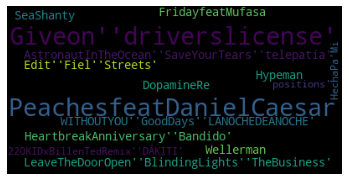

In [28]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
text = tracks_sorted['name'][0:20].values 
text = str(text).replace(" ","").replace("(","").replace(")","").replace(".","")
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()




In [29]:
artists_new=artists.drop(columns=['followers']).sort_values(by=['popularity'],ascending=False)

In [30]:
artists_new.head()

,id_artists,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,100
115489,4q3ewBCX7sLwd24euuV69X,Bad Bunny,98
126338,06HL4z0CvFAxyc27GXpf02,Taylor Swift,98
313676,3TVXtAsR1Inumwj472S9r4,Drake,98
144484,3Nrfpe0tUJi4K4DXYWgMUX,BTS,96


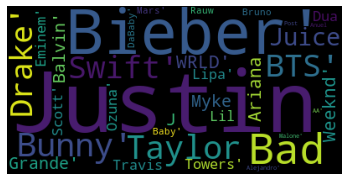

In [31]:
text = artists_new['name'][0:20].values 
text = str(text).replace("","")
wordcloud = WordCloud().generate(str(text))


plt.imshow(wordcloud)
plt.axis("off")
plt.show()


## Model

In [32]:
df=tracks
feature_cols=['acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo', 'time_signature', 'valence',]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df =scaler.fit_transform(df[feature_cols])

print(normalized_df[:2])

[[0.67670683 0.65085772 0.02199391 0.445      0.744      0.
  0.151      0.71374816 1.         0.46446962 0.42556447 0.6
  0.127     ]
 [0.8002008  0.70131181 0.01688468 0.263      0.         0.
  0.148      0.57917279 1.         0.98558187 0.41402949 0.2
  0.655     ]]


In [33]:
import pandas as pd
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances
from sklearn.metrics import jaccard_score
from sklearn import preprocessing

In [34]:
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [35]:
len(normalized_df)

586672

In [36]:
normalised_df=normalized_df.astype(np.float32)[0:1x000]

In [37]:

#cosine = cosine_similarity(normalized_df)

cosine = pairwise_distances(normalized_df, metric='cosine')
jaccard=pairwise_distances(normalized_df, metric='jaccard')


: 

: 

In [ ]:
#manhattan=manhattan_distances(normalized_df)
manhattan=pairwise_distances(normalized_df, metric='manhattan')

In [ ]:

#eucledian=euclidean_distances(normalized_df)
eucledian=pairwise_distances(normalized_df,metric='euclidean')

In [ ]:




def generate_recommendation(song_title,func_name, model_type=cosine):
    
        
    index=indices[song_title]
    #print("this",list(enumerate(model_type[indices[song_title]])))
    score=list(enumerate(model_type[index]))
    '''if(func_name!="cosine"):
        score=list(enumerate(model_type[index][::-1]))
    else:
        score=list(enumerate(model_type[index]))'''
    #similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    #similarity_score = similarity_score[1:11]
    similarity_score = sorted(score,key = lambda x:x[1])
    similarity_score = similarity_score[1:11]
    top_songs_index = [i[0] for i in similarity_score]
    top_songs=df['name'].iloc[top_songs_index]
    sum_sim=0
    for x in similarity_score:
        sum_sim+=x[1]
    #print(similarity_score)
    sim_score=sum_sim/10
    if(func_name!="jaccard" and func_name!="cosine"):
        #sim_score=1-sum_sim
        pass
    print(func_name,sim_score)
    return top_songs

In [ ]:
indices

name
Carve                                       0
Capítulo 2.16 - Banquero Anarquista         1
Vivo para Quererte - Remasterizado          2
El Prisionero - Remasterizado               3
Lady of the Evening                         4
                                        ...  
云与海                                    586667
blind                                  586668
What They'll Say About Us              586669
A Day At A Time                        586670
Mar de Emociones                       586671
Length: 586672, dtype: int64

In [ ]:
print("Recommended Songs:")
print(generate_recommendation('Carve',"cosine",cosine).values)
print(generate_recommendation('Carve',"jaccard",jaccard).values)

Recommended Songs:
cosine 0.03957929296655989
['Swing from Paris' 'Francesita - Remasterizado' 'The Flat Foot Floogie'
 'Leave to Live' 'Corazón de Oro - Instrumental (Remasterizado)'
 'Summer Blues' 'Virgencita del Talar - Remasterizado'
 'Por Ahi Maria Se Va' 'Cigarrillo - Remasterizado' 'Mélodia de Arrabal']
jaccard 0.0
['Tu Verras Montmartre' 'How High the Moon' 'Marta'
 'Hush-A-Bye (Wee Rose of Kilarney)' 'Serenade of the Bells'
 "As If I Didn't Have Enough On My Mind" "Baby Won't You Please Come Home"
 'Down Hearted Blues' "Sobbin' Hearted Blues" 'Chimes Blues']


In [ ]:
print(generate_recommendation('Carve',"manhattan",manhattan).values)
print(generate_recommendation('Carve',"eucledian",eucledian).values)

manhattan 1.5165417704566582
['Prelude and Fugue in C Major, BWV 545: II. Fugue'
 'Francesita - Remasterizado' 'Summer Blues' 'Appel direct'
 'Swing from Paris'
 'Mozart: Symphony No. 41 in C Major, K. 551: IV. Molto allegro'
 'Hungarian Rhapsody No. 6 in D-Flat Major, S. 244' 'Leave to Live'
 'Fats Waller Stomp' 'Quereme Serrana - Remasterizado']
eucledian 0.6056565399579311
['Summer Blues' 'The Flat Foot Floogie' 'Francesita - Remasterizado'
 'Swing from Paris' 'Quereme Serrana - Remasterizado' 'Lazy Boi'
 'Mozart: Symphony No. 41 in C Major, K. 551: IV. Molto allegro'
 'Jesús de la Salud' 'Chiquita - Remasterizado'
 'Haydn: String Quartet No. 6 in C Major, Op. 1 No. 6, Hob. III, 6: V. Finale (Presto)']
